## Подготовительная работа

Импортируем модули, которые понадобятся в дальнейшем

In [1]:
%matplotlib inline

import os
from urllib import urlretrieve

import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image, display

import ee

from composite.composite import Aggregator

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Инициализируем EE:

In [2]:
ee.Initialize()

Функции, позволяющие отображать изображения (снимки) в блокнотах:

In [3]:
def get_path(image, geometry):
    return image.getThumbURL({'region' : geometry.getInfo(), 'format': 'png', 'dimensions': 1024})

def download(image, geometry, path_out):
    path = get_path(image, geometry)
    
    if os.path.exists(path_out):
            os.remove(path_out)
    
    urlretrieve(path, path_out)

def show(path_out):
    plt.grid(False)
    plt.imshow(plt.imread(path_out))

## Пример работы

Создадим полигон, ограничивающий нашу область интересов. Для этого возьмем все обучающие данные, склеим их в один большой слой и построим вокруг него ограничивающий многоугольник. Этот многоугольник будем использовать как область интересов.

In [4]:
# рубки
logg = ee.Collection.loadTable('users/kolesovdm/logging')
# не-рубки
non_logg = ee.Collection.loadTable('users/kolesovdm/no_logging')

# Все полигоны склеим в один
# aoi = logg.merge(non_logg).union().first()
# Выпуклая оболочка
# aoi = aoi.geometry().convexHull()
# print aoi.getInfo()

# Выпуклая оболочка неслабо залазит на Китай, лучше указать область руками
aoi = ee.Geometry.Polygon(
        [[[131.66015625, 47.83774100755438],
          [133.9013671875, 48.569943077430054],
          [135.087890625, 48.36598134901881],
          [133.2421875, 45.08386374897908],
          [132.36328125, 43.447601069123124],
          [135.439453125, 43.765804051552465],
          [139.5263671875, 47.98501901992268],
          [139.8779296875, 50.200344653305514],
          [139.921875, 52.047985749215904],
          [138.2080078125, 52.34428838526162],
          [136.142578125, 51.72249069029722],
          [131.30859375, 49.605963198387286]]]);

Создадим 16-ти дневные композиты (медианные).

In [5]:
aggregator = Aggregator(['LANDSAT/LE07/C01/T1_RT_TOA', 'LANDSAT/LC08/C01/T1_RT_TOA'], function='median')
collection = aggregator.aggregate(aoi, 2017, 100, 260, 16)

Возьмем на вскидку второй из них:

In [6]:
image = collection.toList(1, offset=1).get(0)
image = ee.Image(image)

Отобразим его:

In [7]:
vis = {'bands':['red', 'green', 'blue'], 'min': 0, 'max': 1}

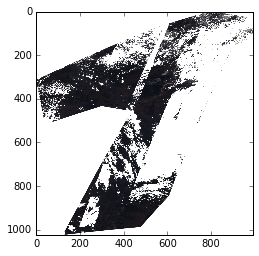

In [8]:
im = image.visualize(**vis)

path = 'aggr.png'
download(im, aoi, path)
show(path)

 Построим для гистограммы яркостей по каждому каналу:

In [9]:
scale = 600

# hist = image.reduceRegion(ee.Reducer.histogram(150), aoi, scale).getInfo()
values = image.reduceRegion(ee.Reducer.toList(), aoi, scale).getInfo()

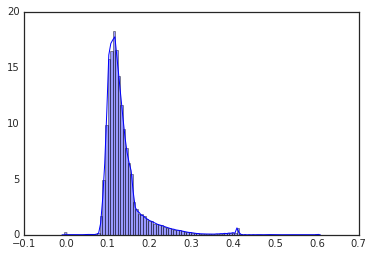

In [10]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['blue'], bins=100)

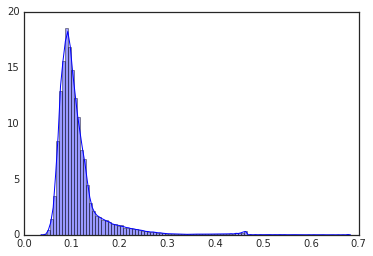

In [11]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['green'], bins=100)

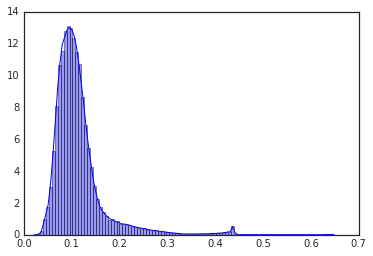

In [12]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['red'], bins=100)

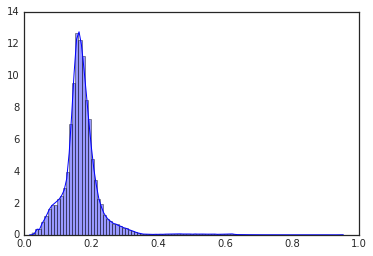

In [13]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['nir'], bins=100)

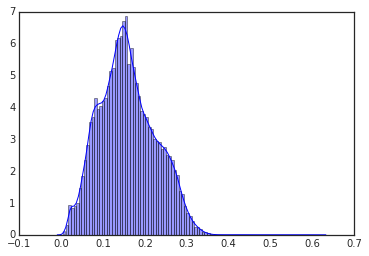

In [14]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['swir1'], bins=100)

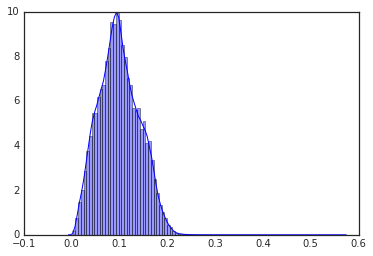

In [15]:
sns.set_style('white')
f = plt.figure()
plt.plot()
sns.distplot(values['swir2'], bins=100)